In [2]:
import lightkurve as lk
%matplotlib inline
toi = 573
tic = 296780789
search_result1 = lk.search_lightcurve('TIC'+str(tic), mission='TESS', exptime=20)
search_result2 = lk.search_lightcurve('TIC'+str(tic), mission='TESS', exptime=120)
print(search_result1)
print(search_result2)

SearchResult containing 1 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 62 2023   SPOC      20   296780789      0.0
SearchResult containing 3 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 08 2019   SPOC     120   296780789      0.0
  1 TESS Sector 35 2021   SPOC     120   296780789      0.0
  2 TESS Sector 62 2023   SPOC     120   296780789      0.0


C:\Users\hamis\AppData\Local\Temp\ipykernel_2088\82943395.py:29: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  lc_binned1=lc1.bin(binsize=6)


NameError: name 'planet_b_model1' is not defined

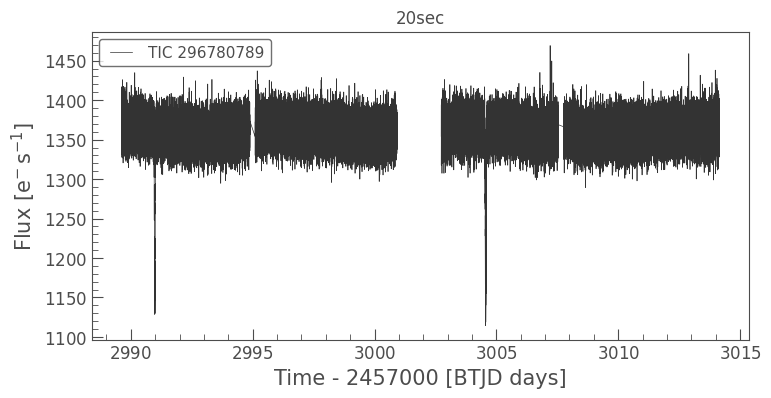

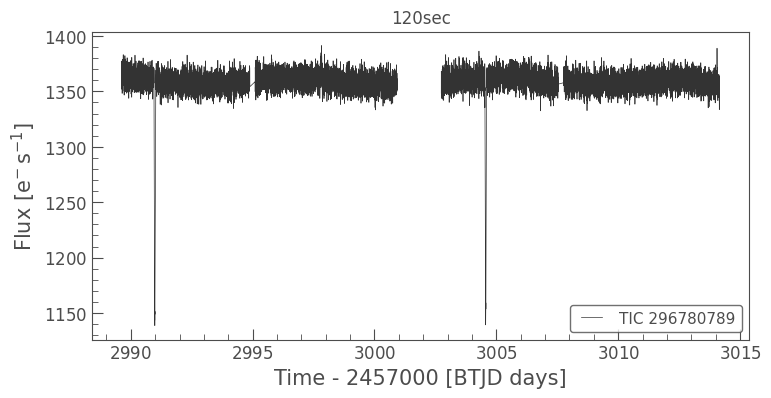

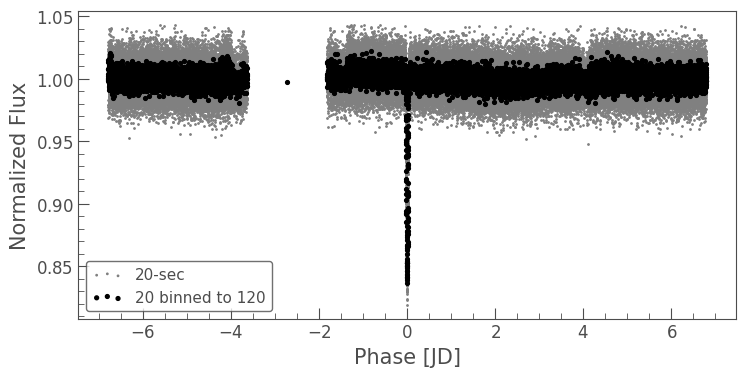

In [3]:
lc_collection1 = search_result1[0].download()
lc_collection2 = search_result2[2].download()

lc1 = lc_collection1.normalize().remove_outliers(sigma_upper=3, sigma_lower=float('inf'))
lc2 = lc_collection2.normalize().remove_outliers(sigma_upper=3, sigma_lower=float('inf'))

lc_collection1.plot().set_title('20sec');
lc_collection2.plot().set_title('120sec');

import numpy as np
# Create array of periods to search
period = np.linspace(0.5, 20, 10000)
# Create a BLSPeriodogram

bls1 = lc1.to_periodogram(method='bls', period=period, frequency_factor=500);
bls2 = lc2.to_periodogram(method='bls', period=period, frequency_factor=500);

planet_b_period1 = bls1.period_at_max_power
planet_b_t01 = bls1.transit_time_at_max_power
planet_b_dur1 = bls1.duration_at_max_power
planet_b_depth1 = bls1.depth_at_max_power
planet_b_period2 = bls2.period_at_max_power
planet_b_t02 = bls2.transit_time_at_max_power
planet_b_dur2 = bls2.duration_at_max_power
planet_b_depth2 = bls2.depth_at_max_power


# bin the light curve (this often helps to make transits more visible)
lc_binned1=lc1.bin(binsize=6)


#ax = lc.fold(period=planet_b_period, epoch_time=planet_b_t0).scatter()
ax1 = lc1.fold(period=planet_b_period1, epoch_time=planet_b_t01).scatter(color='grey',label='20-sec')
lc_binned1.fold(period=planet_b_period1, epoch_time=planet_b_t01).scatter(ax=ax1,color='black',s=30,label='20 binned to 120')
planet_b_model1.fold(planet_b_period1, planet_b_t01).plot(ax=ax1, c='r', lw=2,label='Transit Model')
ax1.set_xlim(-0.5, 0.5);

ax2 = lc2.fold(period=planet_b_period2, epoch_time=planet_b_t02).scatter(color='grey',label='120-sec')
planet_b_model2.fold(planet_b_period2, planet_b_t02).plot(ax=ax2, c='r', lw=2,label='Transit Model')
ax2.set_xlim(-0.5, 0.5);


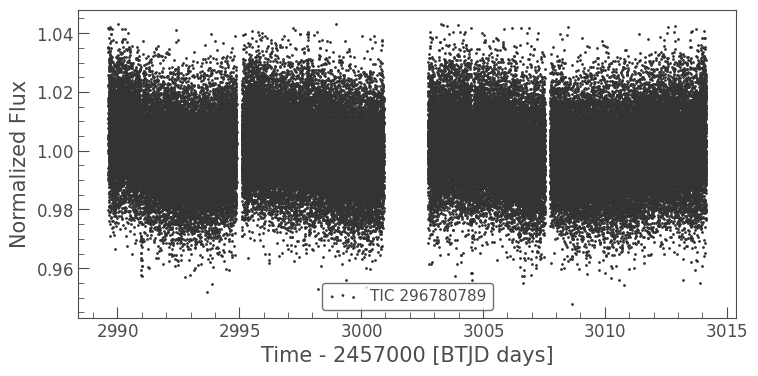

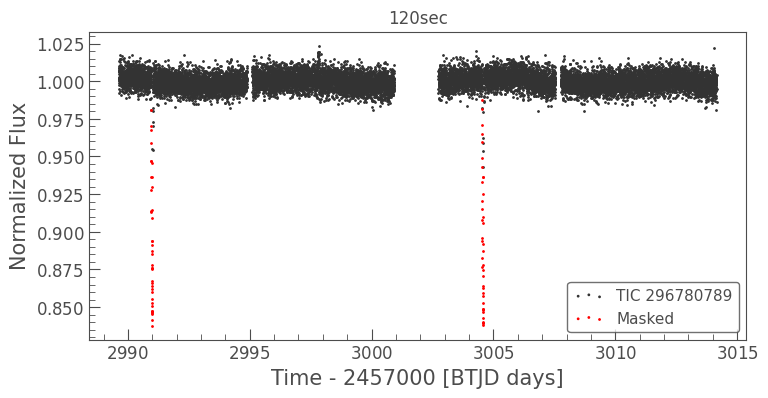

In [4]:
# Create a cadence mask using the BLS parameters
planet_b_mask1 = bls1.get_transit_mask(period=planet_b_period1,
                                     transit_time=planet_b_t01,
                                     duration=planet_b_dur1+planet_b_dur1*0.09)
planet_b_mask2 = bls2.get_transit_mask(period=planet_b_period2,
                                     transit_time=planet_b_t02-0.004,
                                     duration=(planet_b_dur2+planet_b_dur2*0.09))

masked_lc1 = lc1[~planet_b_mask1]
ax1 = masked_lc1.scatter();
# lc1[planet_b_mask1].scatter(ax=ax1, c='r', label='Masked').set_title('20sec');


masked_lc2 = lc2[~planet_b_mask2]
ax2 = masked_lc2.scatter();
lc2[planet_b_mask2].scatter(ax=ax2, c='r', label='Masked').set_title('120sec');






[0.9860062003135681, 0.9832553267478943, 0.9586119651794434, 0.9621263146400452, 0.9418874979019165, 0.967026948928833, 0.9619643688201904, 0.9631392359733582, 0.9561211466789246, 0.9658623337745667, 0.9474267959594727, 0.967962384223938, 0.9411097764968872, 0.959787905216217, 0.9435366988182068, 0.9176315069198608, 0.955945611000061, 0.9480178952217102, 0.9607133865356445, 0.9416182637214661, 0.9598712921142578, 0.9434314966201782, 0.9505693912506104, 0.9450161457061768, 0.9304776191711426, 0.9470809698104858, 0.9339082837104797, 0.9422833323478699, 0.9302067756652832, 0.9231183528900146, 0.9496697187423706, 0.9307705760002136, 0.9099916815757751, 0.9237946271896362, 0.9211909770965576, 0.9193869233131409, 0.9098330140113831, 0.9110050201416016, 0.9185848832130432, 0.9193556904792786, 0.8926563858985901, 0.8890970349311829, 0.9036504626274109, 0.9360784888267517, 0.9005200862884521, 0.9077637791633606, 0.9075205326080322, 0.9092054963111877, 0.8758621215820312, 0.8932020664215088, 0.8

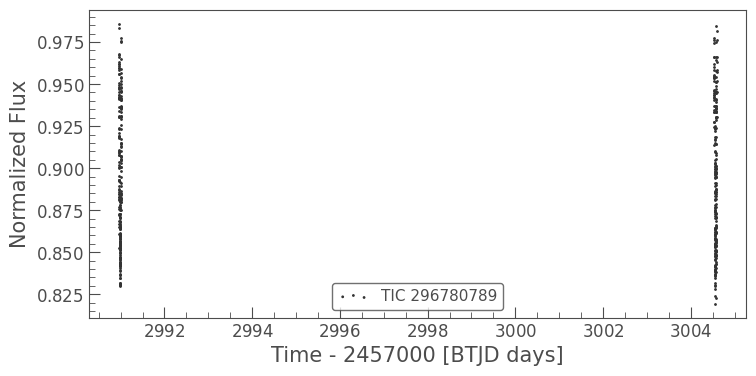

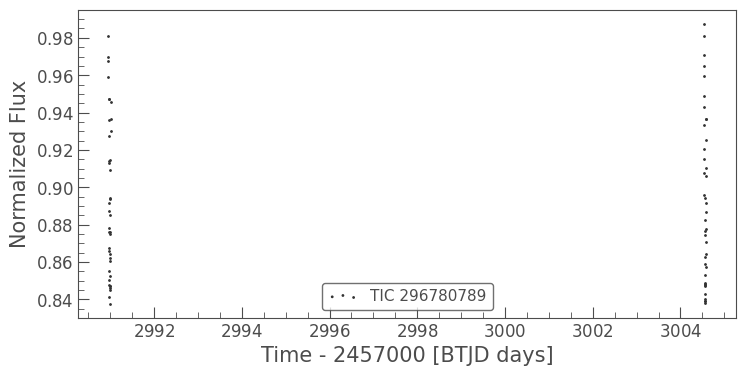

In [18]:

import math as mt

ax1 = lc1[planet_b_mask1].scatter()
ax2 = lc2[planet_b_mask2].scatter()


data20 = lc1[planet_b_mask1].to_pandas()
data120 = lc2[planet_b_mask2].to_pandas()

flux20 = list(data20['flux'])
flux120 = list(data120['flux'])

size20 = len(flux20)
size120 = len(flux120)

p7_20 = mt.ceil(0.07 * size20)
p7_120 = mt.ceil(0.07 * size120)


transit_20 = []
for i in range(p7_20,size20-p7_20):
    transit_20.append(flux20[i])

transit_120 = []
for i in range(p7_120,size120-p7_120):
    transit_120.append(flux120[i])

